In [34]:
from numpy import *
from scipy import *
import numpy as np
from matplotlib import *

from scipy import integrate
from scipy import interpolate
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

import xlrd
import xlsxwriter

rc('text',usetex = True)
rc('font', family='serif',size = 12)

In [2]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
Eff = Data.sheet_by_name('Eff')


Effect = []

for i in range(7):
     Effect.append(array(Eff.col_values(i)))

phi = np.arange(0.1,2.01,0.1)
NTU = np.arange(50,351,50)
NN,PP = np.meshgrid(NTU,phi)
Effectiv = interpolate.interp2d(phi,NTU,Effect,kind = 'linear')

In [3]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Cold')

m_f_HEx_c   = array(HEx.col_values(0)) 
Ec_HEx_c   = array(HEx.col_values(1)) 
W_T_HEx_c   = array(HEx.col_values(2)) 
W_f_HEx_c   = array(HEx.col_values(3)) 
W_p_HEx_c   = array(HEx.col_values(4)) 

In [4]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Hot')

m_f_HEx_h   = array(HEx.col_values(0)) 
Ec_HEx_h   = array(HEx.col_values(1)) 
W_T_HEx_h   = array(HEx.col_values(2)) 
W_f_HEx_h   = array(HEx.col_values(3)) 
W_p_HEx_h   = array(HEx.col_values(4)) 

def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = len(Ec_HEx)-1
    D = len(Ec_HEx)-1
    for i in range(A,B):
        print(i,C)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[C]) and ECr < Ec_HEx[i]:
            C = i
            #print('oic',C)
    for i in range(B,A,-1):
        print(i,D)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[D]) and ECr > Ec_HEx[i]:
            D = i
            #print('oid',D)
    print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [5]:
def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    #print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    #print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = len(Ec_HEx)-1
    D = len(Ec_HEx)-1
    Ref_C = 1
    Ref_D = 0
    for i in range(A,B):
        #print(i,C)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ref_C) and ECr < Ref_C:
            C = i
            Ref_C = Ec_HEx[i]
            #print('oic',C)
    for i in range(B,A,-1):
        #print(i,D)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ref_D) and ECr > Ref_D:
            D = i
            Ref_D = Ec_HEx[i]
            #print('oid',D)
    #print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [6]:
def Radius(X): 
    R2,R3,B,L_m,L_r,h = X
    #return (1.41634776*(R2**-1.10684344)*(R3**2.08169412)*(B**0.74232364))
    #return((B/((0.7390256*R2**1.49668268*R3**-2.71694101)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.23379933))
    #return((B/((0.74794602381*R2**1.50307868*R3**-2.73422634)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.240075))
    A1 = ((B/((0.74794602381*R2**1.50307868*R3**-2.73422634)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.240075))
    #A2 = (B/((0.99497192*R2**1.55620764*R3**(-2.77937455))*np.exp(-0.92376442*(R3-R2)/L_m)*(h**0.08060702)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.1223844)
    A2 = (B/((1.71951251*R2**2.10853942*R3**(-3.7047729))*np.exp(-19.28562192/L_m)*(h**0.06469294)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.38270461)
    return(A2)

In [7]:
def MagField(X,a,b,c,d,e,f):
    R2,R3,R4,h,L,B_rem = X
    return (a*(B_rem)*(R2**b)*(R3**c)*(R4**d)*(np.exp(e*(R3-R2)/L))*(h**f))

In [8]:
def MField(X,a,b,c,d,e):
    V_gap,V_mag,V_out,L,B_rem,R_4 = X
    return (a*(B_rem)*((V_gap/V_mag)**b)*(np.exp(c*R_4/L))*(np.tanh(d*(V_out/V_mag))+e))

In [9]:
def MField_2(X,a,b,c,d,e,f,g):
    R2,R3,R4,L,B_rem,R5 = X
    return (a*(B_rem)*(R2**b)*(R3**c)*(R4**d)*(np.exp(e*(R3-R2)/L))*(np.tanh(f*(R5**2-R4**2)/(R4**2-R3**2))+g))

In [10]:
def Qc(X): 
    P1,P2,P3,P4,P5= X #Q_pas_CB,Q_act_CB,Q_span,W_mag,W_p
    #return( 0.44774473*P1+0.69113695*P2-0.46543184*P3+0.02740828*P4-1.2412753 *P5)
    #return(0.271043*P1+0.49653155*P2-0.28565907*P3+1*P4-1.13502211*P5)
    #return(0.66679759*P1 +  0.8505155*P2 -0.6893551*P3 -0.94156247*P4-0.34938015*P5)
    return(0.59410225*P1+  0.88061713*P2 -0.62088895*P3 -1*P4         -0.34465627*P5)

In [11]:
def Qh(X): 
    P1,P2,P3,P4,P5= X
    #return(0.46673225*P1+1.40322589*P2-0.49908018*P3+0.01575257*P4-0.68914607*P5)
    #return(0.36735687*P1+1*P2-0.38713269*P3+1*P4-0.21881993*P5)
    #return(0.77855664*P1+ 1.44966907*P2 -0.80985607*P3+ 0.39133248*P4+  0.65808892*P5)
    return(0.71673365*P1 + 1.42540766*P2 -0.74956013*P3  + 0.63910187*P4 + 0.64031711*P5)

def W_m(X):
    P1,P2,P3 = X
    #a = 0.00541105
    #a = 0.00937193
    a = 2.89392107e-03
    
    #b = -2.21029128
    #b = -0.99809109
    b = -3.14070133e+00
    
    #c = 2.84461382
    #c = 4.33008264
    c = 3.20699560e+00
    
    #d = 2.85861479
    #d = 1.61088792
    d = 3.81307556e+00
    
    return(a*P1**b*P2**c*P3**d )

In [12]:
def W_m(P1,P2,P3,m_s,f):
    
    a = -4.24746211e-05
    b = 8.59623501e-01
    c = 3.06311253e-05
    d = 8.29382882e-01,
    e = 6.04968831e-01,
    
    return (m_s*f*P3*(a*P1**b+c*(P2)**d)*P3**e)

In [13]:
def W_Hex(X):
    P1,P2 = X
    return (a*P1**b + c*P2**d)

In [14]:
def Prop_param(X):
    T_c,T_h,B = X
    C_H = 1.65161038/100*T_c+2.59946197*T_h-1.14324309*100*B
    C_L = 10.16443738*T_c-5.32568341*T_h-0.71305997*B
    dT_mg = -0.01057708*T_c+0.01163704*T_h+1.73509682*B
    dT_dmg = -0.01229483*T_c+0.01376157*T_h+0.76454655*B
    CdT_mg = -9.517569*T_c+11.49711993*T_h+820.04168503*B
    CdT_dmg = 4.39480124*T_c-7.07931118/10*T_h+9.15928168*100*B
    return(C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg)

In [15]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx') #Import inputs File
Inputs = Data.sheet_by_name('Data') 

L   = array(Inputs.col_values(0)) #Import AMR Length [mm]
H   = array(Inputs.col_values(1)) #Import AMR Height [mm]
W   = array(Inputs.col_values(2)) #Import AMR Width [mm]
T_c = array(Inputs.col_values(3))+273.15 #Import temperature span [K]
T_h = array(Inputs.col_values(4))+273.15 #Import temperature span [K]
B   = array(Inputs.col_values(5)) #Import magnetic field [T]
f   = array(Inputs.col_values(6)) #Import frequency [Hz]
m_f = array(Inputs.col_values(7))/3600 #Import mass flow rate [kg/h]
Q_c = array(Inputs.col_values(8)) #Import Cooling capacity [W]
Q_h = array(Inputs.col_values(9)) #Import Rejected heat [W]
W_p = array(Inputs.col_values(10)) #Import Pumping power [W]
W_ma = array(Inputs.col_values(11)) #Import Magnetic power [W]
T_c_ml = array(Inputs.col_values(12))+273.15 #Import temperature span [K]
T_h_ml = array(Inputs.col_values(13))+273.15 #Import temperature span [K]


Calculation

In [16]:
def Optimal(m_f,FE,f,L,H,W,B,Tc,Th,Tce,The,L_xt,h_f):
    
    ##Properties of the solid 
    #rho_s = 7900  #[kg/m3] Density of the solid
    #k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

    ## Propertis of the fluid
    #rho_f = 1000  #[kg/m3] Density of the fluid
    #c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
    #Pr_f  = 6.136 #[-] Prandtl of the fluid
    #mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
    #k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

    ## Porous medium
    #d_p = 500*10**(-6) #[m] Particle diameter
   
    #Epsilon = 0.45 #0.55  #[-] Porosity
    #Epsilon_dp = 0.36 #0.465 #[-] Porosity
    d_ph = (2/3)*Epsilon_dp/(1-Epsilon_dp)*d_p #290*10**(-6) #[m] Particle diameter
        
    #Magnetic Circuit
    #B_rem = 1.43
    #N_p = 2
    #N_Rp = 2
    
    ### CALCULATION ###
    
    #Porous medium
    

    N_reg = 4/FE
    
    #Regenerador Quadrad
    R2 = [W/2+t_w]/np.tan(np.pi/N_reg)-t_h
    R3 = np.sqrt((W/2)**2 + (R2+t_h+H)**2)+t_h
    
   
    
    #R_aux = np.sqrt((R2+t_h)**2-(W/2)**2)
    #R3 = np.sqrt((H+8+R_aux)**2+(W/2)**2)
    
    #Regenerador Circular
    
    #R_med = (4/FE)/(2*np.pi)*(W + 2*t_w)
    #R2 = R_med-(H/2+t_h)
    #R3 = R_med+(H/2+t_h)
    
    #A_st = H*W
    #A_aux_st = ((2*np.pi/(4/FE)-4*t_w/(R2+R3))/2)*((R3-t_h)**2-(R2+t_h)**2)
    A_aux_st = (np.pi/(4/FE))*((R3-t_h)**2-(R2+t_h)**2) - 2*t_w*((R3-t_h)-(R2+t_h))
    A_st = A_aux_st[0]
    

    m_s   = L*A_st*10**-9*(1-Epsilon)*rho_s #mass of the AMR

    Beta = (1-Epsilon)*6/d_p
    v_s   = (m_f)/(rho_f*A_st*10**-6) #Superficial velocity

    #Dimensionless Numbers
    Re_dp = d_p*v_s*rho_f/(mu_f) #Reynolds number
    Nu = 2*(1+4*(1-Epsilon_dp)/Epsilon_dp)+((1-Epsilon_dp)**0.5)*Re_dp**0.6*Pr_f**(1/3) # Nusselt number
    Pe = Re_dp*Pr_f
    h_int = Nu*k_f/d_p
    NTU_f  = h_int*Beta*(L*A_st*10**(-9))/(m_f*c_f) 
    #print(Re_dp)
    dP = (L/1000)*(150*(1-Epsilon_dp)**2*mu_f*v_s/(Epsilon_dp**3*d_p**2) + 1.75*(1-Epsilon_dp)*rho_f*v_s**2/(Epsilon_dp**3*d_p))
    
    #dP = 0.5*413.11*(v_s*d_ph*rho_f/mu_f)**-0.514*rho_f*v_s**2*(L/1000)/d_ph
    #print(dP/dP_1)
    
    #Effective conduction
    #k_e_f = k_f*Epsilon #Fluid effective conduction

    #a_0 = exp(-1.084-6.778*(Epsilon-0.298))
    #f_0 = 0.8
    #k_e_s = k_f*((1-a_0)*(Epsilon*f_0+(1-Epsilon*f_0)*k_s/k_f)/(1-Epsilon*(1-f_0)+k_s/k_f*Epsilon*(1-f_0))+a_0*(2*((k_s/k_f)**2)*(1-Epsilon)+(1+2*Epsilon)*k_s/k_f)/((2+Epsilon)*k_s/k_f+(1-Epsilon))) #Solid effective conduction

    #D_ = (k_f*rho_f/c_f)*0.75*Pe/2

    #k_s_eff = k_e_s
    #k_f_eff = k_e_f + rho_f*c_f*D_
    
    ##### Properties Calculation ######   
    C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg = Prop_param((Tce,The,B))

    ##### Porous media effectivness #####

    C_HB = ((m_f)*c_f)/(m_s*C_L*f)
    C_CB = ((m_f)*c_f)/(m_s*C_H*f)

    Efness_HB = Effectiv(C_HB/2,NTU_f)
    Efness_CB = Effectiv(C_CB/2,NTU_f)

    #print(Efness_HB,Efness_CB,h_int,Nu,v_s,Re_dp)


    ## Metrics ##
    Pi_4 = CdT_mg/CdT_dmg
    Pi_6 = ((m_f)*c_f)/(m_s*C_L*f)
    Pi_11 = ((m_f)*c_f)/(m_s*C_H*f)
    Pi_15 = (C_L-C_H)*(The-Tce)
    
    Q_pas_CB = Efness_CB*(The - Tce)*m_f*FE*c_f
    Q_act_CB = dT_mg*m_f*c_f*FE

    Q_pas_HB = Efness_HB*(The - Tce)*m_f*FE*c_f
    Q_act_HB = dT_dmg*m_f*c_f*FE

    Q_span = (The - Tce)*m_f*c_f*FE
    #Q_cond = ((1-Epsilon)*k_s_eff + Epsilon*k_f_eff)*(W*H*10**-6)*(The-Tce)/L
    W_mag  = m_s*f*(CdT_mg - CdT_dmg)
    W_mag = W_m(Pi_6,Pi_11,Pi_15,m_s,f)
    W_pump = dP*m_f/rho_f*2*(FE)
    #print(Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump)

    ######Calculation#######
    
    FL = (0.45238549*(1+L_xt)**3-2.34797947*(1+L_xt)**2 +4.06737728*(1+L_xt)-1.44601011)*R2**-0.14716104*R3**(0.15172723)
    
    Qc_reg = Qc((Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump))*FL
    Qh_reg = Qh((Q_pas_HB,Q_act_HB,Q_span,W_mag,W_pump))*FL
    #print(Qc_reg,Qh_reg)
    #N_reg = Qc_target/Qc_reg
    Qc_target = Qc_reg*N_reg 
    Qh_target = Qh_reg*N_reg

    ECr_c = Qc_target/(FE*N_reg*m_f*c_f*(Tc-Tce))
    ECr_h = Qh_target/(FE*N_reg*m_f*c_f*(The-Th))
    
    B_rem = 1.43
    

    R4 = Radius((R2,R3,B/B_rem,L*(1+L_xt),L,h_f))
    

    
    #print(m_s,f,CdT_dmg,((Pi_6,Pi_4,Pi_11)))
    

    
    return (Qc_target,ECr_c,ECr_h,R4,R3,R2,W_mag,W_pump,Qh_target,L_xt,FL,dP)

In [17]:
plt.plot(m_f_p,m_p,'x')

NameError: name 'm_f_p' is not defined

In [18]:
m_f = np.arange(500,900,5)/3600
FE  = np.arange(25/100,30/100,5/100) 
f = np.arange(4,4.1,1)
L = np.arange(120,131,5)
H = np.arange(30,41,5)
W = np.arange(30,51,5)
B_max = np.arange(1.1,1.37,0.03)
Tce = np.arange(15,16,2)
The = np.arange(42,43,2)
L_xt = np.arange(0.15,0.35,0.02)
d_par = np.arange(700*10**-6,701*10**-6,200*10**-6)
h_f = np.arange(35,36,5)
#d_par = [500*10**-6]

In [19]:
len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)*len(L_xt)*len(d_par)*len(h_f)

4500

In [20]:
plt.plot(m_f_p,m_Rt_p,'o')

NameError: name 'm_f_p' is not defined

In [21]:
plt.plot(W_p,m_Rt_p,'o')

NameError: name 'm_Rt_p' is not defined

In [22]:
plt.plot((1+np.array(L_xt_p))*np.array(L_p)/90,(np.array(R4_p) - np.array(R3_p))/50,'o')

plt.grid()
plt.xlabel('Axial Segments [-]')
plt.ylabel('Radial Segments [-]')
#plt.ylim(1100,1300)
#plt.xlim(700,750)
plt.savefig('N_segments.png',format = 'png', dpi=500,bbox_inches='tight')

NameError: name 'L_xt_p' is not defined

In [23]:
Q_c = []
cont = 0

T_c = 22
T_h = 35

Q_c_target = 2650

m_f_target = []
FE_target = []
f_target = []
L_target = []
H_target = []
W_target = []
Tce_target = []
The_target = []
ECr_c = []
ECr_h = []
R4 = []
R3 = []
R2 = []
W_mag = []
W_pump = []
B_target = []
Q_h = []
L_xt_target = []
FL_target = []
dp_target = []
hf_target = []
PD_target = []

##Properties of the solid 
rho_s = 7000  #[kg/m3] Density of the solid
k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

## Propertis of the fluid
rho_f = 1000  #[kg/m3] Density of the fluid
c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
Pr_f  = 6.136 #[-] Prandtl of the fluid
mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

## Porous medium


#Magnetic Circuit
B_rem = 1.43
N_p = 2
N_Rp = 2

t_h = 2
t_w = 1

for i in range(size(FE)):
    for j in range(len(f)):
        for k in range(len(L)):
            for l in range(len(H)):
                for m in range(len(W)):
                    for n in range(len(Tce)):
                        for o in range(len(The)):
                            for p in range(len(B_max)):
                                for q in range(len(L_xt)):
                                    for r in range(len(d_par)):
                                        for s in range(len(h_f)):
                                            it = 0
                                            Q_c_system = 0

                                            d_p = d_par[r] #[m] Particle diameter

                                            Epsilon = 0.5 #0.55  #[-] Porosity
                                            Epsilon_ep = 0.25
                                            Epsilon_dp = Epsilon - Epsilon_ep #0.36 #0.465 #[-] Porosity
                                            d_ph = (2/3)*Epsilon_dp/(1-Epsilon_dp)*d_p #290*10**(-6) #[m] Particle diameter
                                            #h_f = 40

                                            while Q_c_system < Q_c_target and it < len(m_f):
                                                A,B,C,D,E,F,G,A1,A2,A3,A4,A5 = Optimal(m_f[it],FE[i],f[j],L[k],H[l],W[m],B_max[p],T_c+273.15,T_h+273.15,Tce[n]+273.15,The[o]+273.15,L_xt[q],h_f[s])
                                                Q_c_system = A[0]
                                                it = it + 1
                                                #print(A,B,C,D,E,F,G,A1,A2,A3)
                                                #print(m_f[it-1]*3600,Q_c_system )
                                            #print(it,Q_c_system)
                                            if Q_c_system > Q_c_target:
                                                Q_c.append(Q_c_system)
                                                m_f_target.append(3600*m_f[it-1])
                                                FE_target.append(FE[i])
                                                f_target.append(f[j])
                                                L_target.append(L[k])
                                                H_target.append(H[l])
                                                W_target.append(W[m])
                                                Tce_target.append(Tce[n])
                                                The_target.append(The[o])
                                                B_target.append(B_max[p])
                                                dp_target.append(d_p)
                                                hf_target.append(h_f[s])
                                                PD_target.append(A5)
                                                
                                                ECr_c.append(B[0])
                                                ECr_h.append(C[0])
                                                R4.append(D[0])
                                                R3.append(E[0])
                                                R2.append(F[0])
                                                W_mag.append(G[0])
                                                W_pump.append(A1)
                                                Q_h.append(A2[0])
                                                L_xt_target.append(A3)
                                                FL_target.append(A4)

                                            cont = cont+1
                                    print(100*cont/(len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)*len(L_xt)*len(d_par)*len(h_f)))


0.022222222222222223
0.044444444444444446
0.06666666666666667
0.08888888888888889
0.1111111111111111
0.13333333333333333
0.15555555555555556
0.17777777777777778
0.2
0.2222222222222222
0.24444444444444444
0.26666666666666666
0.28888888888888886
0.3111111111111111
0.3333333333333333
0.35555555555555557
0.37777777777777777
0.4
0.4222222222222222
0.4444444444444444
0.4666666666666667
0.4888888888888889
0.5111111111111111
0.5333333333333333
0.5555555555555556
0.5777777777777777
0.6
0.6222222222222222
0.6444444444444445
0.6666666666666666
0.6888888888888889
0.7111111111111111
0.7333333333333333
0.7555555555555555
0.7777777777777778
0.8
0.8222222222222222
0.8444444444444444
0.8666666666666667
0.8888888888888888
0.9111111111111111
0.9333333333333333
0.9555555555555556
0.9777777777777777
1.0
1.0222222222222221
1.0444444444444445
1.0666666666666667
1.0888888888888888
1.1111111111111112
1.1333333333333333
1.1555555555555554
1.1777777777777778
1.2
1.2222222222222223
1.2444444444444445
1.2666666666

10.88888888888889
10.911111111111111
10.933333333333334
10.955555555555556
10.977777777777778
11.0
11.022222222222222
11.044444444444444
11.066666666666666
11.088888888888889
11.11111111111111
11.133333333333333
11.155555555555555
11.177777777777777
11.2
11.222222222222221
11.244444444444444
11.266666666666667
11.28888888888889
11.311111111111112
11.333333333333334
11.355555555555556
11.377777777777778
11.4
11.422222222222222
11.444444444444445
11.466666666666667
11.488888888888889
11.511111111111111
11.533333333333333
11.555555555555555
11.577777777777778
11.6
11.622222222222222
11.644444444444444
11.666666666666666
11.688888888888888
11.71111111111111
11.733333333333333
11.755555555555556
11.777777777777779
11.8
11.822222222222223
11.844444444444445
11.866666666666667
11.88888888888889
11.911111111111111
11.933333333333334
11.955555555555556
11.977777777777778
12.0
12.022222222222222
12.044444444444444
12.066666666666666
12.088888888888889
12.11111111111111
12.133333333333333
12.1555

21.466666666666665
21.488888888888887
21.511111111111113
21.533333333333335
21.555555555555557
21.57777777777778
21.6
21.622222222222224
21.644444444444446
21.666666666666668
21.68888888888889
21.711111111111112
21.733333333333334
21.755555555555556
21.77777777777778
21.8
21.822222222222223
21.844444444444445
21.866666666666667
21.88888888888889
21.91111111111111
21.933333333333334
21.955555555555556
21.977777777777778
22.0
22.022222222222222
22.044444444444444
22.066666666666666
22.08888888888889
22.11111111111111
22.133333333333333
22.155555555555555
22.177777777777777
22.2
22.22222222222222
22.244444444444444
22.266666666666666
22.288888888888888
22.31111111111111
22.333333333333332
22.355555555555554
22.377777777777776
22.4
22.42222222222222
22.444444444444443
22.466666666666665
22.488888888888887
22.511111111111113
22.533333333333335
22.555555555555557
22.57777777777778
22.6
22.622222222222224
22.644444444444446
22.666666666666668
22.68888888888889
22.711111111111112
22.7333333333

32.333333333333336
32.355555555555554
32.37777777777778
32.4
32.422222222222224
32.44444444444444
32.46666666666667
32.48888888888889
32.51111111111111
32.53333333333333
32.55555555555556
32.577777777777776
32.6
32.62222222222222
32.644444444444446
32.666666666666664
32.68888888888889
32.71111111111111
32.733333333333334
32.75555555555555
32.77777777777778
32.8
32.82222222222222
32.84444444444444
32.86666666666667
32.888888888888886
32.91111111111111
32.93333333333333
32.955555555555556
32.977777777777774
33.0
33.022222222222226
33.044444444444444
33.06666666666667
33.08888888888889
33.111111111111114
33.13333333333333
33.15555555555556
33.17777777777778
33.2
33.22222222222222
33.24444444444445
33.266666666666666
33.28888888888889
33.31111111111111
33.333333333333336
33.355555555555554
33.37777777777778
33.4
33.422222222222224
33.44444444444444
33.46666666666667
33.48888888888889
33.51111111111111
33.53333333333333
33.55555555555556
33.577777777777776
33.6
33.62222222222222
33.64444444

43.55555555555556
43.577777777777776
43.6
43.62222222222222
43.644444444444446
43.666666666666664
43.68888888888889
43.71111111111111
43.733333333333334
43.75555555555555
43.77777777777778
43.8
43.82222222222222
43.84444444444444
43.86666666666667
43.888888888888886
43.91111111111111
43.93333333333333
43.955555555555556
43.977777777777774
44.0
44.022222222222226
44.044444444444444
44.06666666666667
44.08888888888889
44.111111111111114
44.13333333333333
44.15555555555556
44.17777777777778
44.2
44.22222222222222
44.24444444444445
44.266666666666666
44.28888888888889
44.31111111111111
44.333333333333336
44.355555555555554
44.37777777777778
44.4
44.422222222222224
44.44444444444444
44.46666666666667
44.48888888888889
44.51111111111111
44.53333333333333
44.55555555555556
44.577777777777776
44.6
44.62222222222222
44.644444444444446
44.666666666666664
44.68888888888889
44.71111111111111
44.733333333333334
44.75555555555555
44.77777777777778
44.8
44.82222222222222
44.84444444444444
44.86666666

54.71111111111111
54.733333333333334
54.75555555555555
54.77777777777778
54.8
54.82222222222222
54.84444444444444
54.86666666666667
54.888888888888886
54.91111111111111
54.93333333333333
54.955555555555556
54.977777777777774
55.0
55.022222222222226
55.044444444444444
55.06666666666667
55.08888888888889
55.111111111111114
55.13333333333333
55.15555555555556
55.17777777777778
55.2
55.22222222222222
55.24444444444445
55.266666666666666
55.28888888888889
55.31111111111111
55.333333333333336
55.355555555555554
55.37777777777778
55.4
55.422222222222224
55.44444444444444
55.46666666666667
55.48888888888889
55.51111111111111
55.53333333333333
55.55555555555556
55.577777777777776
55.6
55.62222222222222
55.644444444444446
55.666666666666664
55.68888888888889
55.71111111111111
55.733333333333334
55.75555555555555
55.77777777777778
55.8
55.82222222222222
55.84444444444444
55.86666666666667
55.888888888888886
55.91111111111111
55.93333333333333
55.955555555555556
55.977777777777774
56.0
56.02222222

65.6
65.62222222222222
65.64444444444445
65.66666666666667
65.68888888888888
65.71111111111111
65.73333333333333
65.75555555555556
65.77777777777777
65.8
65.82222222222222
65.84444444444445
65.86666666666666
65.88888888888889
65.91111111111111
65.93333333333334
65.95555555555555
65.97777777777777
66.0
66.02222222222223
66.04444444444445
66.06666666666666
66.08888888888889
66.11111111111111
66.13333333333334
66.15555555555555
66.17777777777778
66.2
66.22222222222223
66.24444444444444
66.26666666666667
66.28888888888889
66.31111111111112
66.33333333333333
66.35555555555555
66.37777777777778
66.4
66.42222222222222
66.44444444444444
66.46666666666667
66.4888888888889
66.5111111111111
66.53333333333333
66.55555555555556
66.57777777777778
66.6
66.62222222222222
66.64444444444445
66.66666666666667
66.68888888888888
66.71111111111111
66.73333333333333
66.75555555555556
66.77777777777777
66.8
66.82222222222222
66.84444444444445
66.86666666666666
66.88888888888889
66.91111111111111
66.9333333333

77.06666666666666
77.08888888888889
77.11111111111111
77.13333333333334
77.15555555555555
77.17777777777778
77.2
77.22222222222223
77.24444444444444
77.26666666666667
77.28888888888889
77.31111111111112
77.33333333333333
77.35555555555555
77.37777777777778
77.4
77.42222222222222
77.44444444444444
77.46666666666667
77.4888888888889
77.5111111111111
77.53333333333333
77.55555555555556
77.57777777777778
77.6
77.62222222222222
77.64444444444445
77.66666666666667
77.68888888888888
77.71111111111111
77.73333333333333
77.75555555555556
77.77777777777777
77.8
77.82222222222222
77.84444444444445
77.86666666666666
77.88888888888889
77.91111111111111
77.93333333333334
77.95555555555555
77.97777777777777
78.0
78.02222222222223
78.04444444444445
78.06666666666666
78.08888888888889
78.11111111111111
78.13333333333334
78.15555555555555
78.17777777777778
78.2
78.22222222222223
78.24444444444444
78.26666666666667
78.28888888888889
78.31111111111112
78.33333333333333
78.35555555555555
78.37777777777778


88.42222222222222
88.44444444444444
88.46666666666667
88.4888888888889
88.5111111111111
88.53333333333333
88.55555555555556
88.57777777777778
88.6
88.62222222222222
88.64444444444445
88.66666666666667
88.68888888888888
88.71111111111111
88.73333333333333
88.75555555555556
88.77777777777777
88.8
88.82222222222222
88.84444444444445
88.86666666666666
88.88888888888889
88.91111111111111
88.93333333333334
88.95555555555555
88.97777777777777
89.0
89.02222222222223
89.04444444444445
89.06666666666666
89.08888888888889
89.11111111111111
89.13333333333334
89.15555555555555
89.17777777777778
89.2
89.22222222222223
89.24444444444444
89.26666666666667
89.28888888888889
89.31111111111112
89.33333333333333
89.35555555555555
89.37777777777778
89.4
89.42222222222222
89.44444444444444
89.46666666666667
89.4888888888889
89.5111111111111
89.53333333333333
89.55555555555556
89.57777777777778
89.6
89.62222222222222
89.64444444444445
89.66666666666667
89.68888888888888
89.71111111111111
89.73333333333333
89

In [24]:
N_circ_cold = 7
N_circ_hot = 7

W_FT_c = np.zeros(len(m_f_target))
W_Ff_c = np.zeros(len(m_f_target))
W_Fp_c = np.zeros(len(m_f_target))

W_FT_h = np.zeros(len(m_f_target))
W_Ff_h = np.zeros(len(m_f_target))
W_Fp_h = np.zeros(len(m_f_target))


for i in range(len(m_f_target)):
    print(i/len(m_f_target)*100)
    [W_FT_c[i],W_Ff_c[i],W_Fp_c[i]] = HEx_Power(m_f_HEx_c,W_T_HEx_c,W_f_HEx_c,W_p_HEx_c,Ec_HEx_c,4*m_f_target[i]/N_circ_cold,ECr_c[i])
    [W_FT_h[i],W_Ff_h[i],W_Fp_h[i]] = HEx_Power(m_f_HEx_h,W_T_HEx_h,W_f_HEx_h,W_p_HEx_h,Ec_HEx_h,4*m_f_target[i]/N_circ_hot,ECr_h[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_c[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_h[i])

0.0
0.03977724741447892
0.07955449482895784
0.11933174224343676
0.15910898965791567
0.1988862370723946
0.23866348448687352
0.27844073190135243
0.31821797931583135
0.35799522673031026
0.3977724741447892
0.4375497215592681
0.47732696897374705
0.5171042163882259
0.5568814638027049
0.5966587112171837
0.6364359586316627
0.6762132060461415
0.7159904534606205
0.7557677008750995
0.7955449482895784
0.8353221957040573
0.8750994431185362
0.9148766905330152
0.9546539379474941
0.994431185361973
1.0342084327764518
1.0739856801909307
1.1137629276054097
1.1535401750198886
1.1933174224343674
1.2330946698488463
1.2728719172633254
1.3126491646778042
1.352426412092283
1.3922036595067622
1.431980906921241
1.47175815433572
1.511535401750199
1.5513126491646778
1.591089896579157
1.6308671439936355
1.6706443914081146
1.7104216388225937
1.7501988862370723
1.7899761336515514
1.8297533810660305
1.869530628480509
1.9093078758949882
1.9490851233094668
1.988862370723946
2.028639618138425
2.0684168655529036
2.1081941

17.780429594272075
17.820206841686556
17.859984089101033
17.899761336515514
17.93953858392999
17.979315831344472
18.01909307875895
18.05887032617343
18.098647573587908
18.138424821002385
18.178202068416866
18.217979315831347
18.257756563245824
18.2975338106603
18.337311058074782
18.377088305489263
18.416865552903737
18.456642800318217
18.4964200477327
18.536197295147176
18.575974542561653
18.615751789976134
18.65552903739061
18.695306284805092
18.73508353221957
18.77486077963405
18.814638027048527
18.85441527446301
18.894192521877486
18.933969769291963
18.973747016706444
19.013524264120925
19.053301511535402
19.09307875894988
19.13285600636436
19.17263325377884
19.212410501193318
19.252187748607795
19.291964996022276
19.331742243436754
19.371519490851234
19.411296738265712
19.451073985680193
19.49085123309467
19.53062848050915
19.570405727923628
19.610182975338105
19.649960222752586
19.689737470167064
19.72951471758154
19.76929196499602
19.809069212410503
19.84884645982498
19.888623707

35.600636435958634
35.64041368337311
35.68019093078759
35.719968178202066
35.75974542561654
35.79952267303103
35.839299920445505
35.87907716785998
35.91885441527447
35.958631662688944
35.99840891010342
36.0381861575179
36.077963404932376
36.11774065234686
36.15751789976134
36.197295147175815
36.23707239459029
36.27684964200477
36.316626889419254
36.35640413683373
36.39618138424821
36.43595863166269
36.47573587907717
36.51551312649165
36.555290373906125
36.5950676213206
36.63484486873509
36.674622116149564
36.71439936356404
36.754176610978526
36.793953858392996
36.83373110580747
36.87350835322196
36.913285600636435
36.95306284805092
36.9928400954654
37.03261734287987
37.07239459029435
37.11217183770883
37.151949085123306
37.19172633253779
37.23150357995227
37.27128082736675
37.31105807478122
37.3508353221957
37.390612569610184
37.43038981702466
37.47016706443914
37.50994431185362
37.5497215592681
37.58949880668258
37.629276054097055
37.66905330151153
37.70883054892602
37.748607796340494

53.619729514717584
53.65950676213206
53.699284009546545
53.739061256961016
53.77883850437549
53.81861575178998
53.858392999204455
53.89817024661894
53.93794749403341
53.977724741447894
54.01750198886237
54.05727923627685
54.09705648369133
54.1368337311058
54.17661097852029
54.216388225934764
54.25616547334925
54.295942720763726
54.335719968178196
54.37549721559268
54.41527446300716
54.45505171042164
54.49482895783612
54.534606205250604
54.574383452665074
54.61416070007955
54.653937947494036
54.693715194908506
54.733492442323
54.77326968973747
54.813046937151945
54.85282418456643
54.8926014319809
54.93237867939539
54.97215592680986
55.011933174224346
55.05171042163882
55.09148766905329
55.131264916467785
55.171042163882255
55.21081941129674
55.25059665871122
55.2903739061257
55.33015115354017
55.36992840095465
55.40970564836913
55.44948289578361
55.489260143198095
55.529037390612565
55.56881463802705
55.60859188544153
55.648369132856004
55.68814638027049
55.72792362768496
55.76770087509

71.75815433571996
71.79793158313444
71.83770883054893
71.8774860779634
71.91726332537789
71.95704057279237
71.99681782020684
72.03659506762132
72.0763723150358
72.11614956245029
72.15592680986475
72.19570405727923
72.23548130469372
72.27525855210818
72.31503579952268
72.35481304693715
72.39459029435163
72.43436754176611
72.47414478918058
72.51392203659506
72.55369928400954
72.59347653142403
72.63325377883851
72.67303102625299
72.71280827366746
72.75258552108194
72.79236276849642
72.8321400159109
72.87191726332539
72.91169451073985
72.95147175815434
72.99124900556882
73.0310262529833
73.07080350039777
73.11058074781225
73.15035799522673
73.1901352426412
73.2299124900557
73.26968973747017
73.30946698488464
73.34924423229913
73.3890214797136
73.42879872712808
73.46857597454256
73.50835322195705
73.54813046937151
73.58790771678599
73.62768496420048
73.66746221161495
73.70723945902944
73.74701670644392
73.78679395385839
73.82657120127287
73.86634844868735
73.90612569610184
73.9459029435163


90.29435163086714
90.33412887828163
90.3739061256961
90.41368337311057
90.45346062052506
90.49323786793954
90.53301511535402
90.5727923627685
90.61256961018299
90.65234685759745
90.69212410501193
90.73190135242642
90.77167859984088
90.81145584725537
90.85123309466985
90.89101034208433
90.9307875894988
90.97056483691328
91.01034208432776
91.05011933174224
91.08989657915673
91.1296738265712
91.16945107398568
91.20922832140016
91.24900556881464
91.28878281622912
91.3285600636436
91.36833731105808
91.40811455847255
91.44789180588702
91.48766905330152
91.52744630071598
91.56722354813047
91.60700079554495
91.64677804295943
91.6865552903739
91.72633253778838
91.76610978520287
91.80588703261733
91.84566428003183
91.8854415274463
91.92521877486078
91.96499602227526
92.00477326968974
92.04455051710421
92.08432776451869
92.12410501193318
92.16388225934764
92.20365950676214
92.24343675417661
92.28321400159109
92.32299124900557
92.36276849642005
92.40254574383454
92.442322991249
92.48210023866349
9

In [25]:
W_p_valve = (2*np.array(m_f_target)/4/1000)**2*10**5**(2*np.array(m_f_target)/3600)/1000*4/np.array(FE_target)
W_valve   = 8*16

In [26]:
m_La = (np.pi*((np.array(R3)-t_h)**2-(np.array(R2)+t_h)**2)- 16*(2*t_w)*((np.array(R3)-t_h)-(np.array(R2)+t_h)))*np.array(L_target)*(1-Epsilon)*7000*10**-9
m_Rt = np.pi*((np.array(R4))**2-np.array(R3)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_St = np.pi*((np.array(R2)**2))*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500
m_Fe = np.pi*((np.array(R4)+hf_target)**2-np.array(R4)**2)*10**-6*((1+np.array(L_xt_target))*np.array(L_target)/1000)*7500 #25**2
m_Nd = m_Rt + m_St + m_Fe
m_w  = (4/np.array(FE_target)*np.array(H_target)*np.array(W_target)*np.array(L_target)*(Epsilon_dp)*1000*10**-9)

In [27]:
m_T = m_La + m_Rt + m_St + m_Fe + m_w
W_T = W_Ff_c + W_Ff_h + W_Fp_c + W_Fp_h +np.array(W_mag)*16 + np.array(W_pump)*16+ W_valve + W_p_valve

In [28]:
m_p = []
W_pa =[]

m_Nd_p = []
m_Rt_p = []
m_La_p = []
m_w_p = []

W_p_CHEx_p = []
W_p_CHEx_f = []
W_p_HHEx_p = []
W_p_HHEx_f = []
W_p_mag = []
W_p_pump = []
W_pa_valve = []
W_pa_p_valve = []


m_f_p = []
FE_p  =[]
f_p = []
L_p = []
H_p = []
W_p = []
B_max_p = []
Tce_p = []
The_p = []
dp_p = []
ECrc_p = []
ECrh_p = []
Qh_p = []
PD_p = []

R2_p = []
R3_p = []
R4_p = []
hf_p = []
L_xt_p = []


for i in range(len(m_T)):
    print(i/len(m_T))
    A = 0
    for j in  range(len(m_T)):
        #if (m_T[i] >= m_T[j] and W_T[i] > W_T[j]) or (m_T[i] > m_T[j] and W_T[i] >= W_T[j]):
        if (m_Rt[i] >= m_Rt[j] and W_T[i] > W_T[j]) or (m_Rt[i] > m_Rt[j] and W_T[i] >= W_T[j]):
            A = 1
    if A == 0 :
        #print(m_T[i],W_T[i])
        m_p.append(m_T[i])
        m_Nd_p.append(m_Nd[i])
        m_Rt_p.append(m_Rt[i])
        m_La_p.append(m_La[i])
        m_w_p.append(m_w[i])
        
        m_f_p.append(m_f_target[i])
        FE_p.append(FE_target[i])
        f_p.append(f_target[i])
        L_p.append(L_target[i])
        H_p.append(H_target[i])
        W_p.append(W_target[i])
        B_max_p.append(B_target[i])
        Tce_p.append(Tce_target[i])
        The_p.append(The_target[i])
        dp_p.append(dp_target[i])
        PD_p.append(PD_target[i])
        
        ECrc_p.append(ECr_c[i])
        ECrh_p.append(ECr_h[i])
        Qh_p.append(Q_h[i])
        
        R2_p.append(R2[i])
        R3_p.append(R3[i])
        R4_p.append(R4[i])
        L_xt_p.append(L_xt_target[i])
        hf_p.append(hf_target[i])
        #A = Optimal(m_f_target[i]/3600,FE_target[i],f_target[i],L_target[i],H_target[i],W_target[i],B_target[i],T_c+273.15,T_h+273.15,Tce_target[i]+273.15,The_target[i]+273.15,L_xt_target[i])
        #print(A[0],m_f_target[i],FE_target[i],f_target[i],L_target[i],H_target[i],W_target[i],B_target[i],T_c+273.15,T_h+273.15,Tce_target[i]+273.15,The_target[i]+273.15,L_xt_target[i])
        
        W_pa.append(W_T[i])
        W_p_CHEx_p.append(W_Fp_c[i])
        W_p_CHEx_f.append(W_Ff_c[i])
        W_p_HHEx_p.append(W_Fp_h[i])
        W_p_HHEx_f.append(W_Ff_h[i])
        W_p_mag.append(np.array(W_mag[i])*4/np.array(FE_target[i]))
        W_p_pump.append(np.array(W_pump[i])*4/np.array(FE_target[i]))
        W_pa_valve.append(W_valve)
        W_pa_p_valve.append(W_p_valve[i])   

0.0
0.0003977724741447892
0.0007955449482895784
0.0011933174224343676
0.0015910898965791568
0.001988862370723946
0.002386634844868735
0.0027844073190135244
0.0031821797931583136
0.003579952267303103
0.003977724741447892
0.004375497215592681
0.00477326968973747
0.005171042163882259
0.005568814638027049
0.0059665871121718375
0.006364359586316627
0.006762132060461416
0.007159904534606206
0.007557677008750994
0.007955449482895784
0.008353221957040573
0.008750994431185362
0.009148766905330152
0.00954653937947494
0.00994431185361973
0.010342084327764518
0.010739856801909307
0.011137629276054098
0.011535401750198886
0.011933174224343675
0.012330946698488464
0.012728719172633254
0.013126491646778043
0.013524264120922832
0.01392203659506762
0.014319809069212411
0.0147175815433572
0.015115354017501989
0.015513126491646777
0.015910898965791568
0.016308671439936355
0.016706443914081145
0.017104216388225936
0.017501988862370723
0.017899761336515514
0.018297533810660304
0.01869530628480509
0.0190930

0.18615751789976134
0.1865552903739061
0.1869530628480509
0.1873508353221957
0.1877486077963405
0.18814638027048528
0.18854415274463007
0.18894192521877487
0.18933969769291964
0.18973747016706444
0.19013524264120923
0.190533015115354
0.1909307875894988
0.1913285600636436
0.1917263325377884
0.19212410501193317
0.19252187748607796
0.19291964996022276
0.19331742243436753
0.19371519490851233
0.19411296738265713
0.19451073985680192
0.1949085123309467
0.1953062848050915
0.1957040572792363
0.19610182975338106
0.19649960222752585
0.19689737470167065
0.19729514717581542
0.19769291964996022
0.19809069212410502
0.19848846459824981
0.19888623707239458
0.19928400954653938
0.19968178202068418
0.20007955449482895
0.20047732696897375
0.20087509944311854
0.2012728719172633
0.2016706443914081
0.2020684168655529
0.2024661893396977
0.20286396181384247
0.20326173428798727
0.20365950676213207
0.20405727923627684
0.20445505171042164
0.20485282418456643
0.2052505966587112
0.205648369132856
0.2060461416070008


0.4478918058870326
0.4482895783611774
0.4486873508353222
0.449085123309467
0.4494828957836118
0.4498806682577566
0.4502784407319014
0.4506762132060461
0.4510739856801909
0.4514717581543357
0.4518695306284805
0.4522673031026253
0.4526650755767701
0.4530628480509149
0.45346062052505964
0.45385839299920444
0.45425616547334924
0.45465393794749404
0.45505171042163883
0.45544948289578363
0.45584725536992843
0.45624502784407317
0.45664280031821797
0.45704057279236276
0.45743834526650756
0.45783611774065236
0.45823389021479716
0.4586316626889419
0.4590294351630867
0.4594272076372315
0.4598249801113763
0.4602227525855211
0.4606205250596659
0.4610182975338107
0.4614160700079554
0.4618138424821002
0.462211614956245
0.4626093874303898
0.4630071599045346
0.4634049323786794
0.4638027048528242
0.46420047732696895
0.46459824980111375
0.46499602227525855
0.46539379474940334
0.46579156722354814
0.46618933969769294
0.4665871121718377
0.4669848846459825
0.4673826571201273
0.4677804295942721
0.468178202068

0.6364359586316627
0.6368337311058074
0.6372315035799523
0.637629276054097
0.6380270485282419
0.6384248210023866
0.6388225934765315
0.6392203659506762
0.639618138424821
0.6400159108989658
0.6404136833731106
0.6408114558472554
0.6412092283214001
0.641607000795545
0.6420047732696897
0.6424025457438345
0.6428003182179793
0.6431980906921241
0.6435958631662689
0.6439936356404137
0.6443914081145584
0.6447891805887033
0.645186953062848
0.6455847255369929
0.6459824980111376
0.6463802704852825
0.6467780429594272
0.6471758154335719
0.6475735879077168
0.6479713603818615
0.6483691328560064
0.6487669053301511
0.649164677804296
0.6495624502784407
0.6499602227525855
0.6503579952267303
0.6507557677008751
0.6511535401750199
0.6515513126491647
0.6519490851233095
0.6523468575974543
0.652744630071599
0.6531424025457438
0.6535401750198886
0.6539379474940334
0.6543357199681782
0.654733492442323
0.6551312649164678
0.6555290373906125
0.6559268098647574
0.6563245823389021
0.656722354813047
0.6571201272871917
0

0.9463007159904535
0.9466984884645983
0.947096260938743
0.9474940334128878
0.9478918058870326
0.9482895783611774
0.9486873508353222
0.949085123309467
0.9494828957836118
0.9498806682577565
0.9502784407319014
0.9506762132060461
0.951073985680191
0.9514717581543357
0.9518695306284806
0.9522673031026253
0.95266507557677
0.9530628480509149
0.9534606205250596
0.9538583929992045
0.9542561654733492
0.954653937947494
0.9550517104216388
0.9554494828957836
0.9558472553699284
0.9562450278440732
0.956642800318218
0.9570405727923628
0.9574383452665075
0.9578361177406524
0.9582338902147971
0.958631662688942
0.9590294351630867
0.9594272076372315
0.9598249801113763
0.960222752585521
0.9606205250596659
0.9610182975338106
0.9614160700079555
0.9618138424821002
0.9622116149562451
0.9626093874303898
0.9630071599045346
0.9634049323786794
0.9638027048528242
0.964200477326969
0.9645982498011137
0.9649960222752586
0.9653937947494033
0.9657915672235481
0.9661893396976929
0.9665871121718377
0.9669848846459825
0.9

In [29]:
Name = str(f[0])+'Hz-dp=' + str(d_par[0])+'mm'+ str(L[0])+'mm'
Name + '.xlsx'

'4.0Hz-dp=0.0007mm120mm.xlsx'

In [30]:
workbook = xlsxwriter.Workbook(Name + '.xlsx')
Data = workbook.add_worksheet(Name)

for i in range(len(m_f_p)):
    Data.write(i,0,m_f_p[i]) 
    Data.write(i,1,FE_p[i])
    Data.write(i,2,f_p[i])
    Data.write(i,3,L_p[i])
    Data.write(i,4,H_p[i])
    Data.write(i,5,W_p[i]) 
    Data.write(i,6,B_max_p[i])
    Data.write(i,7,Tce_p[i])
    Data.write(i,8,The_p[i])
    Data.write(i,9,m_p[i])
    Data.write(i,10,m_Nd_p[i])
    Data.write(i,11,m_La_p[i])
    Data.write(i,12,m_w_p[i])
    Data.write(i,13,W_pa[i])
    Data.write(i,14,W_p_CHEx_p[i])
    Data.write(i,15,W_p_CHEx_f[i])
    Data.write(i,16,W_p_HHEx_p[i])
    Data.write(i,17,W_p_HHEx_f[i])
    Data.write(i,18,W_p_mag[i])
    Data.write(i,19,W_p_pump[i])
    Data.write(i,20,R2_p[i])
    Data.write(i,21,R3_p[i])
    Data.write(i,22,R4_p[i])
    Data.write(i,23,L_xt_p[i])
    Data.write(i,24,hf_p[i])
    Data.write(i,25,ECrc_p[i])
    Data.write(i,26,ECrh_p[i])
    Data.write(i,27,Qh_p[i])
    Data.write(i,28,m_Rt_p[i])
    Data.write(i,29,PD_p[i])
    
workbook.close()

In [31]:
W_T

array([2785.79473147, 2666.34421523, 2839.32136837, ..., 1155.98326056,
       1149.85805302, 1143.67321009])

In [ ]:
plt.plot(m_Rt,W_T,'.')
plt.plot(m_Rt_p,W_pa,'X')

In [40]:
m_2000 = m_Rt_p
W_2000 = W_pa

In [41]:
plt.plot(m_500,W_500,'X')
plt.plot(m_700,W_700,'s')
plt.plot(m_1000,W_1000,'o')
plt.plot(m_2000,W_2000,'^')

NameError: name 'm_500' is not defined

In [ ]:
plt.plot(m_T,W_T,'.')
plt.plot(m_p,W_pa,'X')
plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
#plt.ylim(1100,1300)
#plt.xlim(700,750)
plt.savefig('Optimum_Rotor.png',format = 'png', dpi=500,bbox_inches='tight')

In [ ]:
W_p_pump*0.9

In [ ]:
#plt.plot(m_T,m_La,'.')
plt.plot(R3_p,m_p,'X')

In [ ]:
plt.plot(R4_p,m_p,'x')

In [ ]:
Q_c_new = [[] for i in range(len(m_p))]
m_flow_new = [[] for i in range(len(m_p))]


for i in range(len(m_p)):
    m_flow = np.arange(m_f_p[i]+5,1200,5)
    #print(m_f_p[i])
    for j in range(len(m_flow)):
        A = Optimal(m_flow[j]/3600,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i]+273.15,The_p[i]+273.15,L_xt_p[i],hf_p[i])
        #print(m_flow[j],A[0],i,j,FE_p[i],f_p[i],L_p[i],H_p[i],W_p[i],B_max_p[i],22+273.15,35+273.15,Tce_p[i],The_p[i],L_xt_p[i])
        Q_c_new[i].append(A[0])
        m_flow_new[i].append(m_flow[j])

In [ ]:
for i in range(len(m_p)):
    plt.plot(m_flow_new[i],Q_c_new[i],'-.')
#plt.ylim(2900,4700)
plt.grid()
#plt.legend()
plt.xlabel(r'$\dot{m}_\mathrm{f}$ [kg/h]')
plt.ylabel(r'$\dot{Q}_\mathrm{C}$ [W]')
plt.savefig('Extra.png',format = 'png', dpi=1000,bbox_inches='tight')

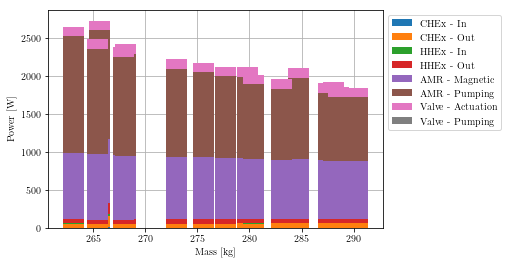

In [117]:
width = 2
plt.grid(zorder = 0)
plt.bar(m_p,W_p_CHEx_p, width, label = 'CHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = W_p_CHEx_p, label = 'CHEx - Out',zorder = 3)
plt.bar(m_p,W_p_HHEx_p, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f), label = 'HHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p), label = 'HHEx - Out',zorder = 3)
plt.bar(m_p,W_p_mag, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f), label = 'AMR - Magnetic',zorder = 3)
plt.bar(m_p,W_p_pump, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) , label = 'AMR - Pumping',zorder = 3)
plt.bar(m_p,W_pa_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f) + np.array(W_p_mag) + np.array(W_p_pump) , label = 'Valve - Actuation',zorder = 3)
plt.bar(m_p,W_pa_p_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) + np.array(W_p_pump)+ np.array(W_pa_valve), label = 'Valve - Pumping',zorder = 3)

#plt.xlim([575,865])
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.legend(bbox_to_anchor = (1,1))
plt.savefig('Power_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [118]:
m_La_p = np.pi*(np.array(R3_p)**2-np.array(R2_p)**2)*np.array(L_p)*(1-Epsilon)*7000*10**-9
m_Rt_p = np.pi*((np.array(R4_p))**2-np.array(R3_p)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2
m_St_p = np.pi*((np.array(R2_p)**2))*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500
m_Fe_p = np.pi*((np.array(R4_p)+np.array(hf_p))**2-np.array(R4_p)**2)*10**-6*((1+np.array(L_xt_p))*np.array(L_p)/1000)*7500 #25**2 


In [ ]:
width = 5
plt.grid(zorder = 0)
plt.bar(W_pa,m_La_p, width, label = 'La',zorder = 3)
plt.bar(W_pa,m_St_p, width,bottom = m_La_p, label = 'Stator',zorder = 3)
plt.bar(W_pa,m_Rt_p, width,bottom = np.array(m_La_p) + np.array(m_St_p), label = 'Rotor',zorder = 3)
plt.bar(W_pa,m_Fe_p, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p), label = 'Fe (10 mm)',zorder = 3)
#plt.bar(W_pa,m_Fe_p_80, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10)+ np.array(m_Fe_p_20)+ np.array(m_Fe_p_40), label = 'Fe (80 mm)',zorder = 3)
plt.legend( bbox_to_anchor=[1, 1])
plt.ylabel('Mass [kg]')
plt.xlabel('Power [W]')
#plt.xlim(870,1300)
#plt.ylim(0,1050)
plt.savefig('Mass_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')